<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Variáveis-aleatórias-conjuntas" data-toc-modified-id="Variáveis-aleatórias-conjuntas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Variáveis aleatórias conjuntas</a></span></li><li><span><a href="#Variáveis-conjuntas-multidimensionais:-caso-geral" data-toc-modified-id="Variáveis-conjuntas-multidimensionais:-caso-geral-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Variáveis conjuntas multidimensionais: caso geral</a></span></li><li><span><a href="#Distribuição-gaussiana-multidimensional" data-toc-modified-id="Distribuição-gaussiana-multidimensional-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Distribuição gaussiana multidimensional</a></span><ul class="toc-item"><li><span><a href="#Funções-distribuição-de-probabilidade-condicionais" data-toc-modified-id="Funções-distribuição-de-probabilidade-condicionais-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Funções distribuição de probabilidade condicionais</a></span></li><li><span><a href="#Independência-estatística" data-toc-modified-id="Independência-estatística-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Independência estatística</a></span></li></ul></li><li><span><a href="#Médias-estatísticas" data-toc-modified-id="Médias-estatísticas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Médias estatísticas</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import numpy as np
from scipy.stats import *

from IPython.core.display import HTML,display, Latex, Math

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

C:\Users\edson.DESKTOP-54IJM4F\AppData\Local\Temp\ipykernel_2576\965535.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML,display, Latex, Math


In [2]:
from sympy import lambdify

# função para print de expressões simbólicas
def symdisp(expr, var, unit=' '):
    '''
    Latex style display of sympy expressions
    
    :param expr: expression in latex [string]
    :param var: sympy variable, function, expression.
    :param unit: string indicating unit of var [string]
    '''
    display(Math(expr+sp.latex(var)+'\;'+unit))
    
# Função para plot de funções do sympy
def symplot(t, F, interval, funLabel, yLabel=''):
    '''
    Create plots of sympy symbolic functions
    
    :param t: sympy variable
    :param F: sympy function F(t)
    :param interval: array of values of t where F should be evaluated [np.array]
    :param funLabel: curve label be displayed in the plot [string]
    :param yLabel: scale of the plot    
    '''
    fig = plt.figure()
    if type(F) == list:
        indLabel = 0
        for f in F:
            func  = lambdify(t, f, modules=['numpy', {'Heaviside': lambda t:np.heaviside(t,0)}])
            f_num = func(interval)
            
            plt.plot(interval, f_num, label=funLabel[indLabel])
            plt.legend();
            plt.xlim([min(interval), max(interval)]);
            plt.xlabel('tempo [s]');
            plt.ylabel(yLabel)
            indLabel += 1
    else:        
        func  = lambdify(t, F, modules=['numpy', {'Heaviside': lambda t:np.heaviside(t,0)}])
        f_num = func(interval)           
                    
        plt.plot(interval, f_num, label=funLabel)
        plt.legend(loc="upper right");
        plt.xlim([min(interval), max(interval)]);
        plt.xlabel('tempo [s]');  
        plt.ylabel(yLabel)          
    
    plt.grid();
    plt.close();
    return fig

## Variáveis aleatórias conjuntas

Sejam duas v.a.s $X$ e $Y$, indicamos suas fda e fdp conjuntas por $F_{X,Y}(x,y)$ e $f_{X,Y}(x,y)$, em que

$$F_{X, Y}(x, y)=P(X \leq x, Y \leq y)$$

$$f_{X, Y}(x, y)=\frac{\partial^{2}}{\partial x \partial y} F_{X, Y}(x, y)$$


**Propriedades:**

1. $F_{X, Y}(x, y)=\int_{-\infty}^{x} \int_{-\infty}^{y} f_{X, Y}(u, v) d u d v$


2. $F_{X}(x)=F_{X, Y}(x, \infty)$


3. $F_{Y}(y)=F_{X, Y}(\infty, y)$


4. $f_{X}(x)=\int_{-\infty}^{\infty} f_{X, Y}(x, y) d y$


5. $f_{Y}(y)=\int_{-\infty}^{\infty} f_{X, Y}(x, y) d x$


6. $\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f_{X, Y}(x, y) d x d y=1$


7. $P((X, Y) \in A)=\iint_{(x, y) \in A} f_{X, Y}(x, y) d x d y$ . 


## Variáveis conjuntas multidimensionais: caso geral

No caso geral, seja $\mathbf{X}=\left[X_{1}, \ldots, X_{k}\right]^T$ um vetor de $k$ v.a.s, a fda conjunta será definida como a função de $F_{\mathbf{X}}: \mathbb{R}^{k} \mapsto[0,1]$ tal que

$$
F_{\mathbf{X}}(\mathbf{x})=\mathrm{P}\left(X_{1} \leq x_{1}, \ldots, X_{k} \leq x_{k}\right) = \int_{-\infty}^{x_{1}} \int_{-\infty}^{x_{2}} \cdots \int_{-\infty}^{x_{k}} f_{\mathbf{X}}\left(u_{1}, u_{2}, \ldots, u_{k}\right) d u_{1} d u_{2} \cdots d u_{k}
$$

em que $\mathbf{x}=\left[x_{1}, \ldots, x_{k}\right]^T$. 

A fdp multidimensional $f_{\mathbf{X}}\left(\mathbf{x}\right) = f_{\mathbf{X}}\left(x_{1}, x_{2}, \ldots, x_{k}\right)$ pode ser obtida a partir das derivadas parciais de $F_{\mathbf{X}}(\mathbf{x})$

$$
f_{\mathbf{X}}\left(x_{1}, x_{2}, \ldots, x_{k}\right)=\frac{\partial^{k}}{\partial x_{1} \partial x_{2} \cdots \partial x_{k}} F_{\mathbf{X}}\left(x_{1}, x_{2}, \ldots, x_{k}\right)
$$

## Distribuição gaussiana multidimensional

Seja $\mathbf{X}=\left[X_{1}, \ldots, X_{k}\right]^T$ um vetor de $k$ v.a.s gaussianas, a pdf conjunta de $\mathbf{X}$ é dada por

$$
f_\mathbf{X}(\mathbf{x})=f_\mathbf{X}\left(x_{1}, \ldots, x_{k}\right)=\frac{\exp \left(-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\mathrm{T}} \mathbf{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right)}{\sqrt{(2 \pi)^{k}|\mathbf{\Sigma}|}}
$$

em que $\mathbf{x}=\left[x_{1}, \ldots, x_{k}\right]^T$, $\boldsymbol{\mu} = E[\mathbf{X}]$ é o vetor de médias e $\mathbf{\Sigma} = E\left[\left(\mathbf{X}-E[\mathbf{X}]\right)\left(\mathbf{X}-E[\mathbf{X}]\right)^T\right]$ é a matriz de covariância.

Para o caso bidimensional, considerando duas variáveis gaussianas $X$ e $Y$

$$\large
f_{X,Y}(x, y)=\frac{1}{2 \pi \sigma_{x} \sigma_{y} \sqrt{1-\rho^{2}}} \mathrm{e}^{-\frac{1}{2\left(1-\rho^{2}\right)}\left[\left(\frac{x-\mu_{x}}{\sigma_{x}}\right)^{2}-2 \rho\left(\frac{x-\mu_{x}}{\sigma_{x}}\right)\left(\frac{y-\mu_{y}}{\sigma_{y}}\right)+\left(\frac{y-\mu_{y}}{\sigma_{y}}\right)^{2}\right]}
$$

em que $X\sim\mathcal{N}(\mu_x, \sigma_x^2)$, $Y\sim\mathcal{N}(\mu_y, \sigma_y^2)$ e 

$$\boldsymbol{\Sigma}=\left[\begin{array}{cc}\sigma_{x}^{2} & \rho \sigma_{x} \sigma_{y} \\ \rho \sigma_{x} \sigma_{y} & \sigma_{y}^{2}\end{array}\right]$$

em que $\rho$ é o coeficiente de correlação entre $X$ e $Y$.

$$\rho =\frac{\mathrm{E}[X Y]-\mathrm{E}[X] \mathrm{E}[Y]}{\sqrt{\mathrm{E}\left[X^{2}\right]-(\mathrm{E}[X])^{2}} \sqrt{\mathrm{E}\left[Y^{2}\right]-(\mathrm{E}[Y])^{2}}}$$

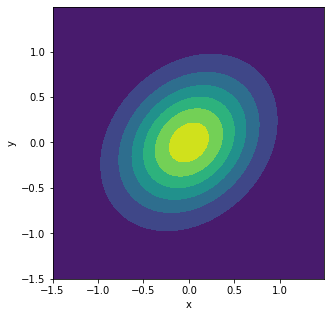

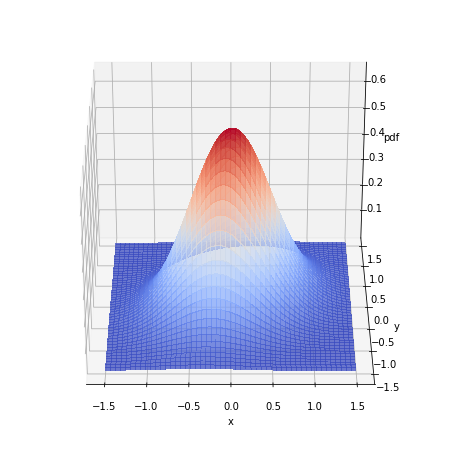

In [5]:
# parâmetros da distribuição
μx = 0  # média de X
μy = 0  # média de Y

σx = 0.5  # desvio padrão de X
σy = 0.5  # desvio padrão de Y
ρ  = 0.25 # coeficiente de correlação entre X e Y
 
μ = [μx, μy]                             # vetor de médias
Σ = [[σx**2, ρ*σx*σy], [ρ*σx*σy, σy**2]] # matriz de covariância

# Distribuição gaussiana bidimensional  
rv = multivariate_normal(μ, Σ)

σ_plot = max(σx,σy)
x = np.arange(-3*σ_plot, 3*σ_plot, .01)
y = np.arange(-3*σ_plot, 3*σ_plot, .01)

x, y = np.meshgrid(x,y)
pos = np.dstack((x, y))

plt.figure(figsize=(5,5))
plt.contourf(x, y, rv.pdf(pos));
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect("equal");

fig2 = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

z = rv.pdf(pos)

ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=1, antialiased=False,alpha=0.75)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('pdf')
ax.view_init(elev=30, azim=270)
plt.show()

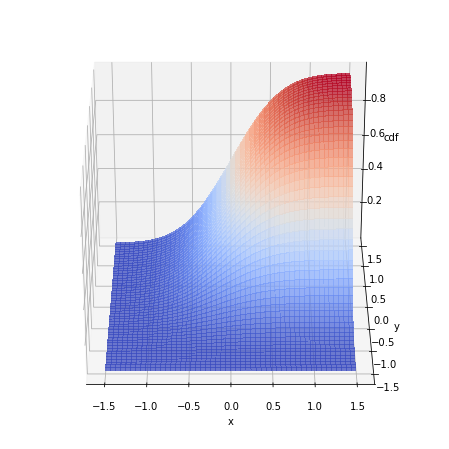

In [4]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

z = rv.cdf(pos)

ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=1, antialiased=False,alpha=0.75)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('cdf')
ax.view_init(elev=30, azim=270)
plt.show()

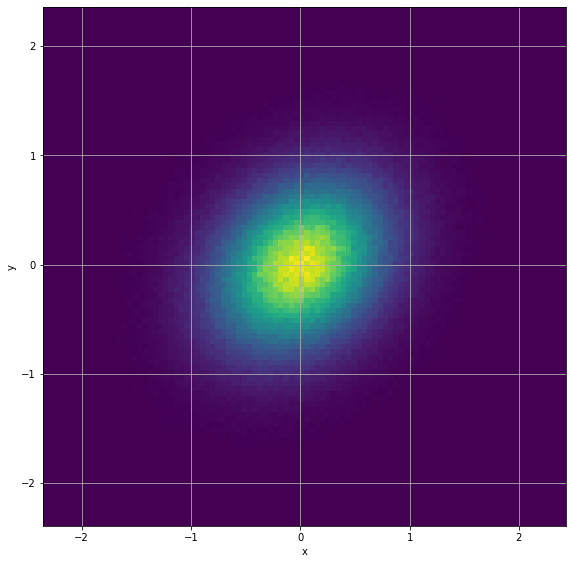

In [5]:
x = rv.rvs(1000000)

plt.figure(figsize=(8,8))
plt.gca().set_aspect("equal");
plt.hist2d(x[:,0], x[:,1], density=False, bins=100, label = 'hist(x,y)');
plt.grid()
plt.xlabel('x')
plt.ylabel('y');
plt.tight_layout()

### Funções distribuição de probabilidade condicionais

Sejam duas v.a.s $X$ e $Y$ com fda e fdp conjuntas dadas por $F_{X,Y}(x,y)$ e $f_{X,Y}(x,y)$, respectivamente. Suponha que desejamos determinar  $P(X \leqslant x)$ dado que o evento $y-\Delta y < Y \leqslant y$ ocorreu.

$$
\begin{equation}
\begin{aligned}
P\left(X \leqslant x | y-\Delta y < Y \leqslant y\right) &=\frac{\int_{-\infty}^{x} \int_{y-\Delta y}^{y} f_{X,Y}\left(u_{1}, u_{2}\right) d u_{1} d u_{2}}{\int_{y-\Delta y}^{y} f_Y\left(u_{2}\right) d u_{2}} \\
&=\frac{F\left(x, y\right)-F\left(x, y-\Delta y\right)}{F\left(y\right)-F\left(y-\Delta y\right)}
\end{aligned}
\end{equation}\label{eq1}
$$

Assumindo que as funções densidade de probabilidade $f_{X,Y}(x,y)$ e $f_{Y}(y)$ são contínuas, podemos dividir o numerador
e o denominador de (\ref{eq1}) por $\Delta y$ e calcular o limite de $\Delta y\rightarrow0$ 

$$
\begin{equation}
\begin{aligned}
P\left(X \leqslant x | Y=y\right) & \equiv F\left(x | y\right)=\frac{\partial F\left(x, y\right) / \partial y}{d F\left(y\right) / d y} \\
&=\frac{\partial\left[\int_{-\infty}^{x} \int_{-\infty}^{y} f_{X,Y}\left(u_{1}, u_{2}\right) d u_{1} d u_{2}\right] / \partial y}{d\left[\int_{-\infty}^{y} f_Y\left(u_{2}\right) d u_{2}\right] / d y} \\
&=\frac{\int_{-\infty}^{x} f_{X,Y}\left(u_{1}, y\right) d u_{1}}{f_Y\left(y\right)}
\end{aligned}
\end{equation}\label{eq2}
$$

Derivando (\ref{eq2}) com relação a $x$, obtemos a fdp condicional correspondente

$$
f_{X|Y}\left(x|y\right)=\frac{f_{X,Y}\left(x, y\right)}{f_Y\left(y\right)}
$$

Alternativamente, também podemos escrever:

$$
\begin{aligned}
f_{X,Y}\left(x, y\right) &= f_{X|Y}\left(x|y\right)f_Y\left(y\right)\\
&= f_{Y|X}\left(y|x\right)f_X\left(x\right)
\end{aligned}
$$

### Independência estatística

Um conjunto de variáveis aleatórias multidimensionais $X_{1}, \ldots, X_{k}$ é estatisticamente independente se, e somente se, a fda e a fdp conjuntas fatoram na forma

$$
F\left(x_{1}, x_{2}, \ldots, x_{k}\right)=F\left(x_{1}\right) F\left(x_{2}\right) \cdots F\left(x_{k}\right)
$$

$$
f\left(x_{1}, x_{2}, \ldots, x_{k}\right)=f\left(x_{1}\right) f\left(x_{2}\right) \cdots f\left(x_{k}\right)
$$

## Médias estatísticas

In [6]:
import sympy as sp
from sympy.stats import Normal, density, P, E, given, Bernoulli, Laplace, variance

X, Y, μ, a, b, p, x, y = sp.symbols('X, Y, μ, a, b, p, x, y', real=True)
σ, n = sp.symbols('σ, n', real=True, positive=True)

In [7]:
X = Normal('X', μ, σ)
Y = Laplace('Y', μ, b)

pdf = density(X)
symdisp('f_X(x) = ', pdf(x))

pdf = density(Y)
symdisp('f_Y(y) = ', pdf(y))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Valor esperado

In [8]:
symdisp('E[X] = ', E(X))
symdisp('E[Y] = ', E(Y))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Momento de ordem 2

In [9]:
symdisp('E[X^2] = ', E(X**2))
symdisp('E[Y^2] = ', E(Y**2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Variância

In [10]:
symdisp('σ_X^2 = ', E( ( X - E(X) )**2 ) )
symdisp('σ_Y^2 = ', E( ( Y - E(Y) )**2 ) )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
X = X.subs([(σ, 1),(μ, 0)])
pdf = density(X)

pdf = density(X)
symdisp('f_X(x) = ', pdf(x))

prob = P(X > -2.5, X < 2.5)

symdisp('P(-1 < X < 1) =', round(prob,2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
Y = Laplace('Y', μ, b)

Y = Y.subs([(b, 1),(μ, 0)])

pdf = density(Y)

symdisp('f_Y(y) = ', pdf(y))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

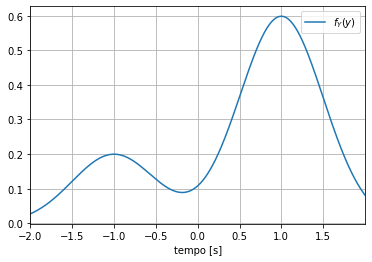

In [31]:
X = Bernoulli('X', 0.25, -1, 1)
N = Normal('N', 0, 0.5)

Y = X + N

pdf = density(Y)

symdisp('f_Y(y) = ', pdf(y))

interval = np.arange(-2,2,0.001)
symplot(y, pdf(y), interval, funLabel='$f_Y(y)$')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

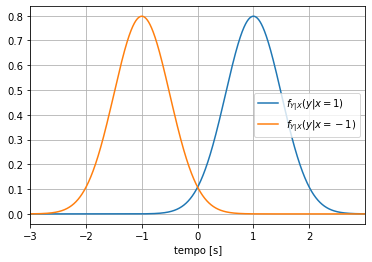

In [21]:
YgX_p = 1 + N
YgX_n = -1 + N

pdf_ygx_p = density(YgX_p)
pdf_ygx_n = density(YgX_n)

symdisp('f_{Y|X}(y|x=1) = ', pdf_ygx_p(y))
symdisp('f_{Y|X}(y|x=-1) = ', pdf_ygx_n(y))

interval = np.arange(-3,3,0.001)
symplot(y, [pdf_ygx_p(y), pdf_ygx_n(y)], interval, funLabel=['$f_{Y|X}(y|x=1)$','$f_{Y|X}(y|x=-1)$'])

In [39]:
symdisp('f_{Y}(y) = f_{Y}(y|x=1)P(X=1) + f_{Y}(y|x=-1)P(X=-1) = ', pdf_ygx_p(y)*P(X>0) + pdf_ygx_n(y)*P(X<0))

<IPython.core.display.Math object>